In [13]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\iamgu\Documents\GitHub\TCGA-LUAD\open_tggates_pathology.csv'
data = pd.read_csv(file_path, encoding='latin1')
# Display the first few rows of the dataset
data.head()


,BARCODE,EXP_ID,GROUP_ID,INDIVIDUAL_ID,COMPOUND_NAME,DOSE_LEVEL,SACRIFICE_PERIOD,ORGAN,FINDING_TYPE,TOPOGRAPHY_TYPE,GRADE_TYPE,SP_FLG
0,No ChipData,698,1,1,1% cholesterol + 0.25% sodium cholate,Control,4 day,Liver,"Deposit, glycogen",Peripheral,slight,True
1,No ChipData,698,2,5,1% cholesterol + 0.25% sodium cholate,Control,8 day,Liver,"Deposit, glycogen",Peripheral,slight,True
2,003017906001,698,5,1,1% cholesterol + 0.25% sodium cholate,High,4 day,Liver,"Degeneration, fatty",Peripheral,slight,False
3,No ChipData,698,5,2,1% cholesterol + 0.25% sodium cholate,High,4 day,Liver,"Degeneration, fatty",Peripheral,slight,False
4,003017906002,698,5,3,1% cholesterol + 0.25% sodium cholate,High,4 day,Liver,"Degeneration, fatty",Peripheral,slight,False


In [15]:
import pandas as pd

# 데이터프레임이 df라고 가정
unique_periods = data['SACRIFICE_PERIOD'].unique()

# 정렬된 결과를 원한다면
unique_periods_sorted = sorted(unique_periods)

print(unique_periods_sorted)

['15 day', '24 hr', '29 day', '3 hr', '4 day', '6 hr', '8 day', '9 hr']


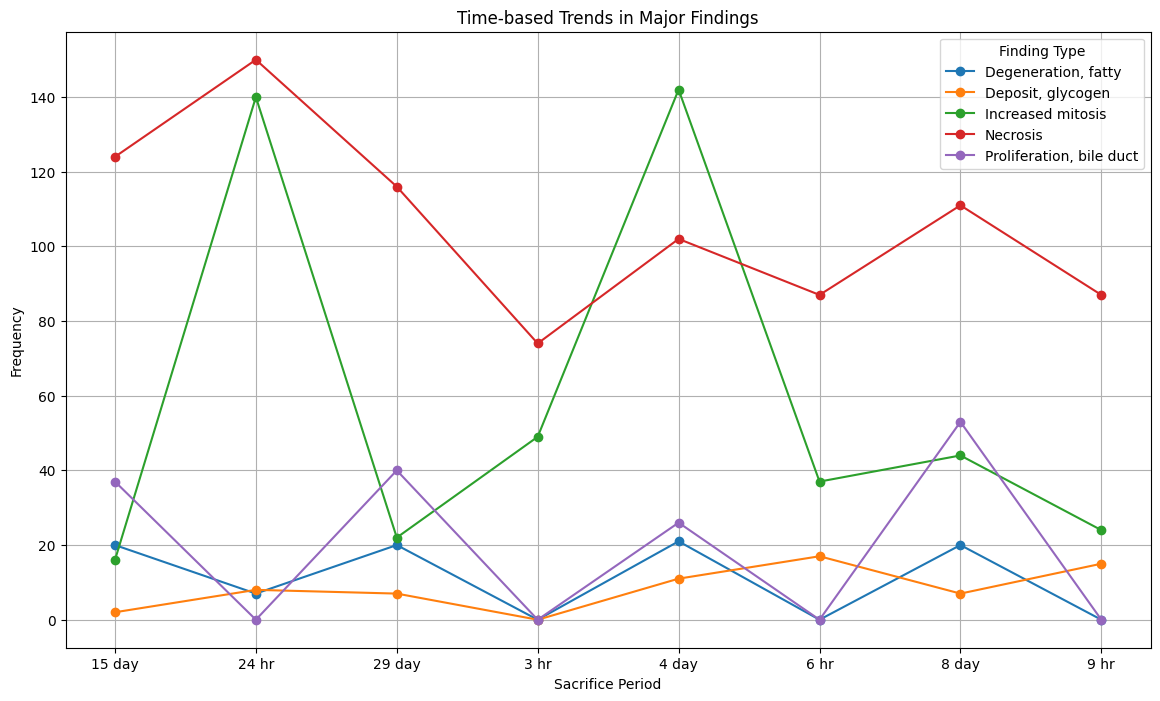

In [12]:
import matplotlib.pyplot as plt
# Update the list of selected findings with the correct terminology
selected_findings = [
    "Degeneration, fatty",
    "Deposit, glycogen",
    "Increased mitosis",
    "Necrosis",
    "Proliferation, bile duct"
]

# Filter data for the selected finding types
filtered_data = data[data['FINDING_TYPE'].isin(selected_findings)]

# Group by sacrifice period and finding type to get counts
time_finding_counts = filtered_data.groupby(['SACRIFICE_PERIOD', 'FINDING_TYPE']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))
for finding in selected_findings:
    plt.plot(time_finding_counts.index, time_finding_counts[finding], label=finding, marker='o')

plt.title('Time-based Trends in Major Findings')
plt.xlabel('Sacrifice Period')
plt.ylabel('Frequency')
plt.legend(title='Finding Type')
plt.grid(True)
plt.show()


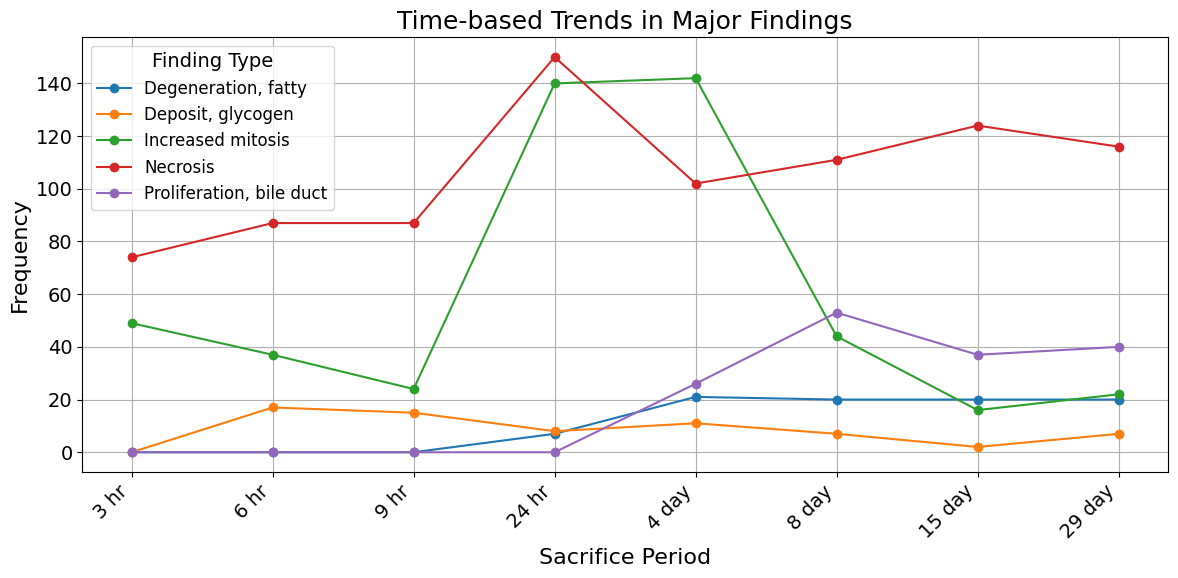

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# 폰트 크기 설정
plt.rcParams.update({'font.size': 14}) 
# Update the list of selected findings with the correct terminology
selected_findings = [
    "Degeneration, fatty",
    "Deposit, glycogen",
    "Increased mitosis",
    "Necrosis",
    "Proliferation, bile duct"
]

# Filter data for the selected finding types
filtered_data = data[data['FINDING_TYPE'].isin(selected_findings)]

# Define the correct order of sacrifice periods
correct_order = ['3 hr', '6 hr', '9 hr', '24 hr', '4 day', '8 day', '15 day', '29 day']

# Group by sacrifice period and finding type to get counts
time_finding_counts = filtered_data.groupby(['SACRIFICE_PERIOD', 'FINDING_TYPE']).size().unstack(fill_value=0)

# Reorder the index based on the correct order
time_finding_counts = time_finding_counts.reindex(correct_order)

# Plotting
plt.figure(figsize=(12, 6))  
for finding in selected_findings:
    plt.plot(time_finding_counts.index, time_finding_counts[finding], label=finding, marker='o')

plt.title('Time-based Trends in Major Findings', fontsize=18)  
plt.xlabel('Sacrifice Period', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)  
plt.legend(title='Finding Type', title_fontsize='14', fontsize='12')  
plt.grid(True)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()